# **Prediction of Product Sales**




### *Author: Matt S.*

## Project Overview

## Load and Inspect Data

In [7]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
## Numpy
import numpy as np
## Pandas
import pandas as pd
## MatPlotlib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

# Save the filepath and load the data as "df_titanic"
file_url = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

df = pd.read_csv(file_url)

### Preview the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

### 1) How many rows and columns?

In [12]:
df.shape

(8523, 12)

### 2) What are the datatypes of each variable?



In [13]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### 3) Are there duplicates? If so, drop any duplicates.



In [14]:
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

No duplicates, nothing to drop.

### 4) Identify missing values.



In [15]:
cols_with_null = df.isna()
cols_with_null.sum()

# I read this output backwards, I am only MISSING 1463 values. I have roughly 80% or so of data for Weight.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).



In [16]:
# Filter for number columns
num_cols = df.select_dtypes('number').columns

In [17]:
# Filter for categorical columns
cat_cols = df.select_dtypes('object').columns

In [18]:
# Set null values in Item_Weight to -1
df[num_cols] = df[num_cols].fillna(-1)

In [19]:
# Set null values in categorical colums to "Missing"
df[cat_cols] = df[cat_cols].fillna("Missing")

### 6) Confirm that there are no missing values after addressing them.



In [20]:
# Check for null values in all columns
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
# Check for unique category values
df[cat_cols].nunique()


# There are:
# 5 types of fat content
# 16 item types etc.

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [22]:
# Check for unique numerical values
df[num_cols].nunique()

Item_Weight                   416
Item_Visibility              7880
Item_MRP                     5938
Outlet_Establishment_Year       9
Item_Outlet_Sales            3493
dtype: int64

In [23]:
# Use the result to determine if any of the columns have 100% unique values.
df.nunique()/len(df) * 100

Item_Identifier              18.291681
Item_Weight                   4.880910
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.046932
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

None of the values have a high unique percentage, so for now we won't change the index.

### 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).



In [24]:
# Obtain the value counts for all string columns
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print("\n")

# df[cat_cols].value_counts()

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930



All of the these columns need to be fixed.

```
Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
```


In [25]:
# Replace variations of "Low Fat" with "Low Fat"
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace=True)

# Replace variations of "Regular" with "Regular"
df['Item_Fat_Content'].replace({'reg': 'Regular'}, inplace=True)


Confirm if the column names are consistent.



In [26]:
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print("\n")

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017

```
Value Counts for Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
```

The values are now consistent.

### 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).


In [27]:
df[num_cols].describe().loc[['min', 'max', 'mean']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914


## Exploratory Data Analysis

In [28]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,-1.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Missing,Tier 2,Supermarket Type1,4710.5350


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Determine numerical columns
Check which columns are numeric so that categorical columns aren't accidentally used in the histograms.

In [30]:
# Filter for number columns
num_cols = df.select_dtypes('number').columns

In [31]:
for col in num_cols:
  print(f"{col}: {df[col].dtype}")
  # print("\n")

Item_Weight: float64
Item_Visibility: float64
Item_MRP: float64
Outlet_Establishment_Year: int64
Item_Outlet_Sales: float64


In [32]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

Item Outlet Sales will be skewed on the graph because the mean is higher than the median.

### Identifying correlations

In [33]:
# Check numerics for correlations
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.079371,0.022367,0.537341,-0.055461
Item_Visibility,-0.079371,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.022367,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.537341,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.055461,-0.128625,0.567574,-0.049135,1.000000


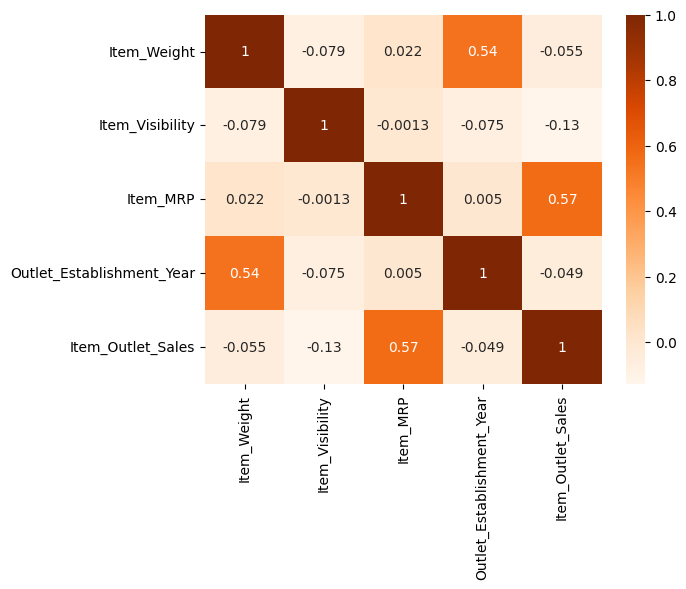

In [34]:
ax = sns.heatmap(corr, cmap='Oranges', annot=True)

Based on the output above:
  - Item MRP and Item Outlet Sales have a moderate correlation at 0.57
  - Item Visibility has no correlation with Item MRP
  - Outlet Year and Weight have a moderate correlation of 0.54, suggesting that some stores may have catered to items with a specific weight in the past (or currently do).

### Histograms for reviewing distrobution of data

Use a loop to print out histograms of all numerical columns for a "bird's eye" view of data.

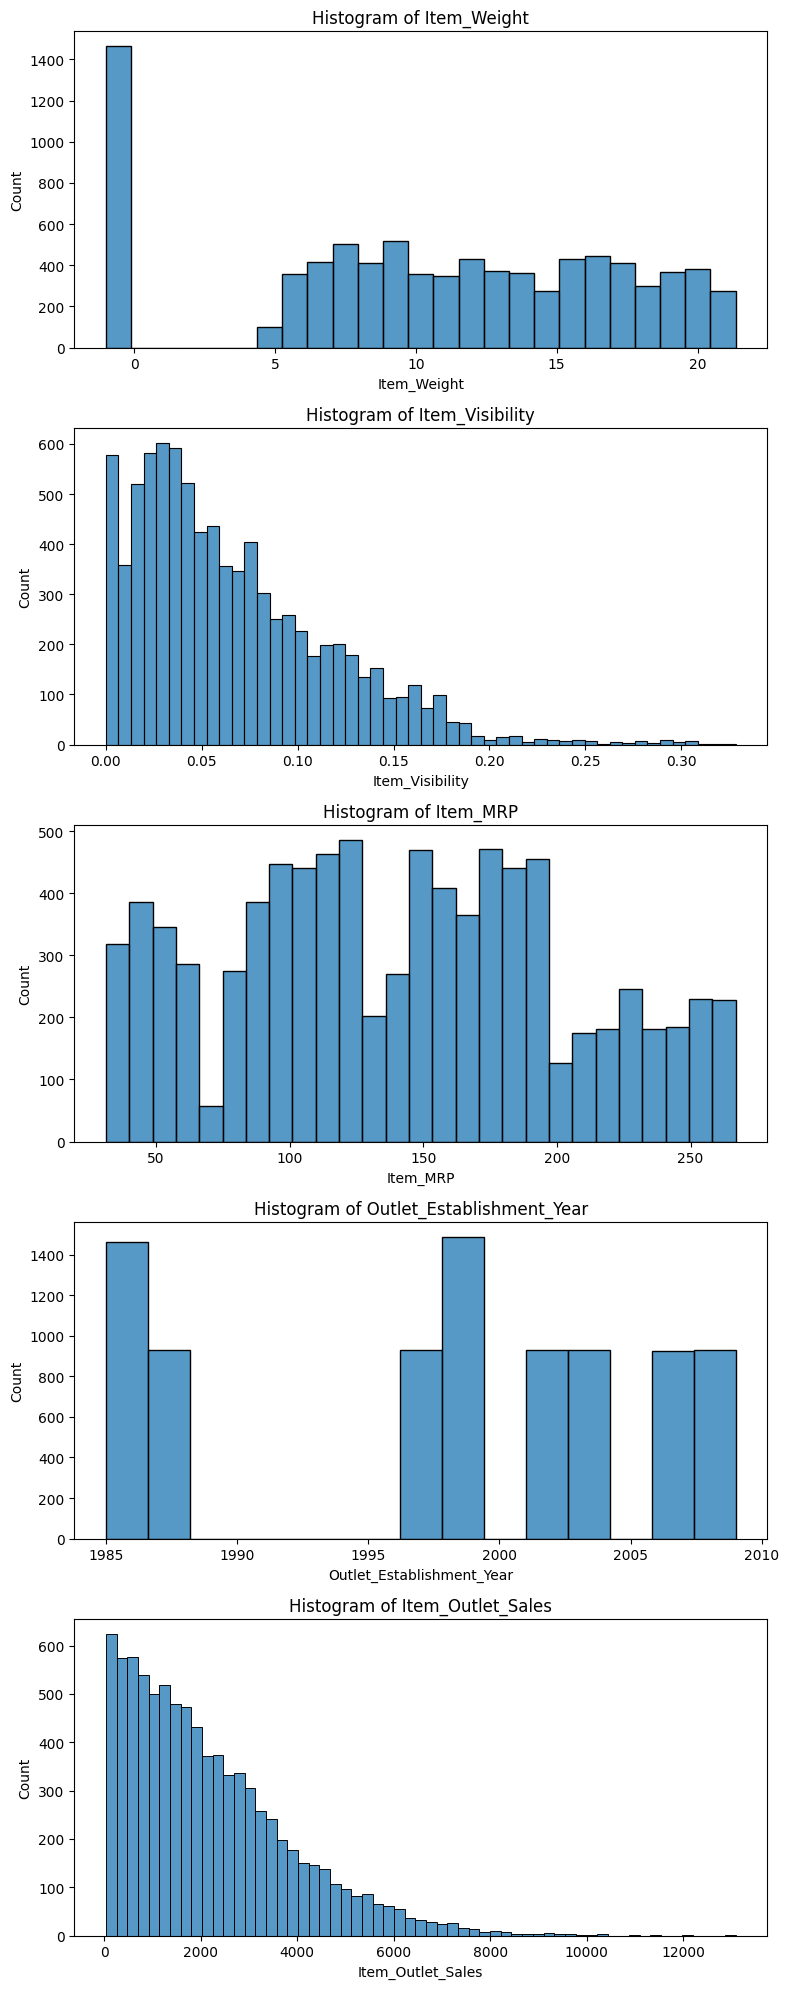

In [35]:
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 20))

# Generate a histogram of all numeric columns for easy comparision
for col, ax in zip(num_cols, axes):
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(f'Histogram of {col}')

# Use tight_layout for readability
plt.tight_layout()
plt.show()

### Boxplots of reviewing distrobution of data

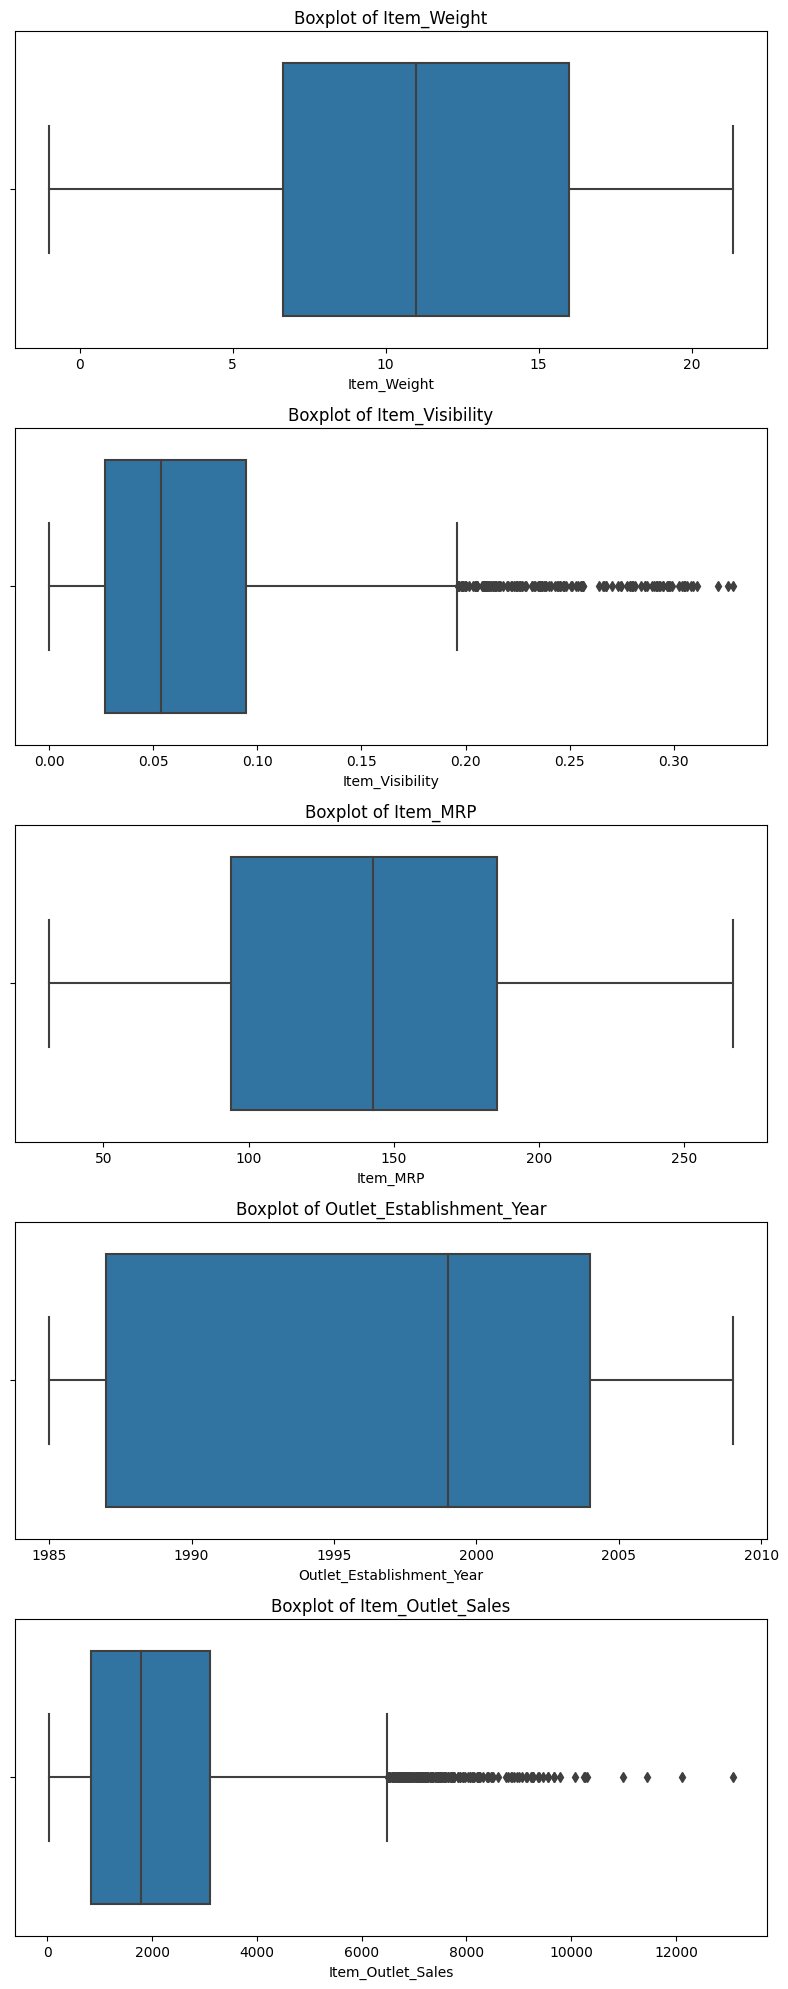

In [41]:
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 20))

# Generate a boxplot of all numeric columns for easy comparision
for col, ax in zip(num_cols, axes):
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')

# Use tight_layout for readability
plt.tight_layout()
plt.show()

- The boxplots show that both Item_Outlet_Sales and Item_Visibility have many outliers.
- The median of outlet establishment shows that most shops were opened around the 1998 or 1999.

## Explanatory Data Analysis

## **Issues and To-Do**


- Don't drop values for now, you should have SCIENTIFIC data to back up your reason for dropping things, not just a gut feeling from what you read.

---
To-Do

- Apply some styles to the graphs

- Review data more in-depth
- Make other graphs to see if different explanations can be gleamed can be seen besides the ones offered by boxplots, heatmaps, and histograms.
  - A regplot on the 0.57 correlating columns would be interesting.
